In [29]:
import pandas as pd
from prophet import Prophet

In [30]:
df = pd.read_csv(r"C:\StudySources\Master\ADS\data\df_cen_extended.csv")
df.head()

,DATE,ZONE,CALERA_PRICE,MIDAGRI_PRICE,FARM_PRICE,KG,IS_HOLIDAY
0,2021-01-02,Centro,3.415467,6.957344,3.349720,72964.1600,1
1,2021-01-03,Centro,3.527205,6.957344,6.250357,7554.2500,1
2,2021-01-04,Centro,3.488930,3.750000,6.250357,54663.7850,1
3,2021-01-05,Centro,3.502867,3.710000,6.250357,40268.8250,1
4,2021-01-06,Centro,3.485359,3.750000,6.250357,47838.0555,1


In [31]:
df1 = df[['DATE', 'MIDAGRI_PRICE']].copy()
df1['DATE'] = pd.to_datetime(df1['DATE'])
df1.rename(columns={'DATE': 'ds', 'MIDAGRI_PRICE': 'y'}, inplace=True)
df1.head()

,ds,y
0,2021-01-02,6.957344
1,2021-01-03,6.957344
2,2021-01-04,3.750000
3,2021-01-05,3.710000
4,2021-01-06,3.750000


In [32]:
m = Prophet()
m.fit(df1)

19:41:14 - cmdstanpy - INFO - Chain [1] start processing
19:41:14 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2054,2026-12-27
2055,2026-12-28
2056,2026-12-29
2057,2026-12-30
2058,2026-12-31


In [34]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2054,2026-12-27,4.117964,2.314718,5.777010
2055,2026-12-28,3.874085,2.001708,5.572113
2056,2026-12-29,3.713119,1.795947,5.336240
2057,2026-12-30,3.807665,2.042693,5.524429
2058,2026-12-31,3.624009,1.864083,5.343459


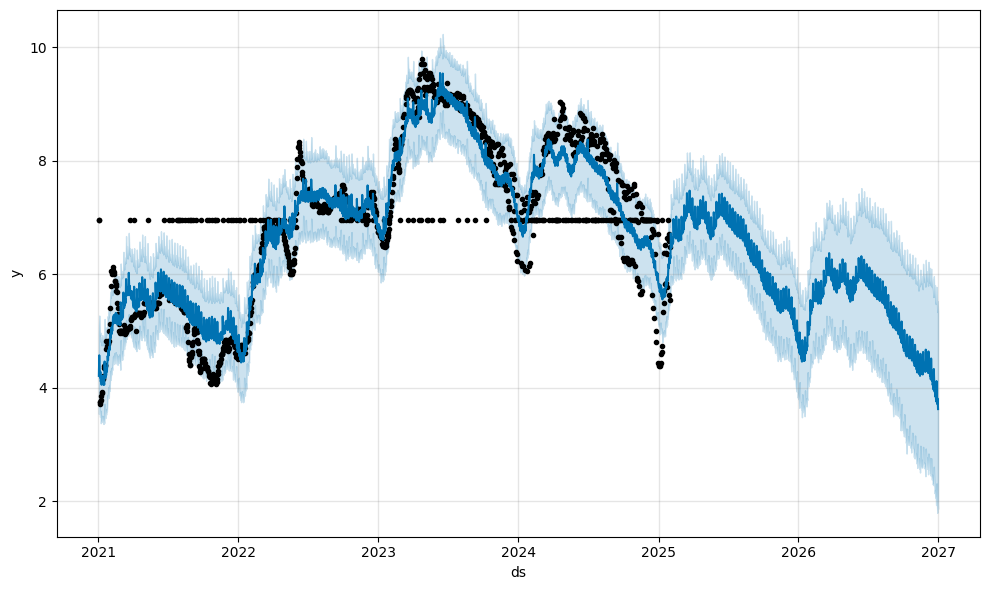

In [35]:
fig1 = m.plot(forecast)

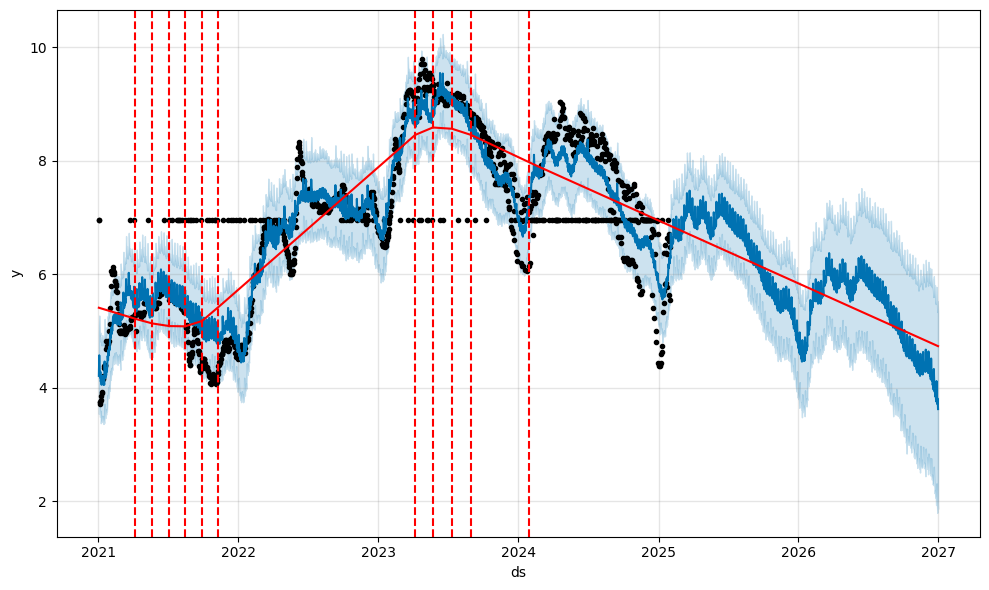

In [36]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

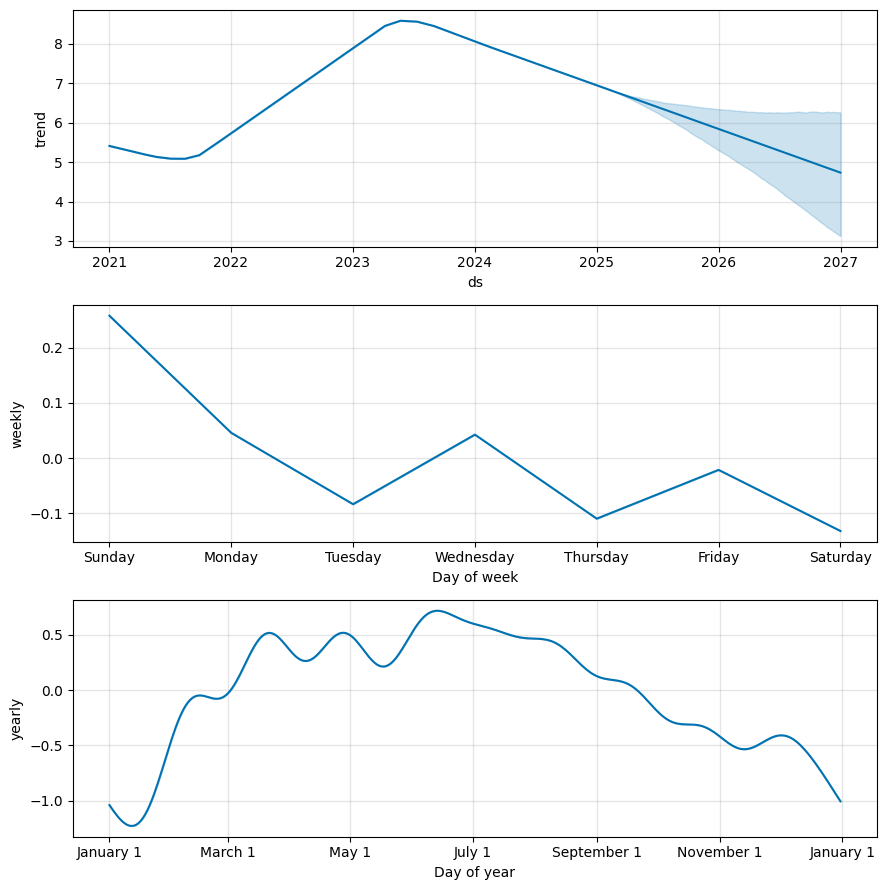

In [37]:
fig2 = m.plot_components(forecast)

In [38]:
# df1['y'] = 10 - df1['y']
# df1['cap'] = 6
# df1['floor'] = 1.5
# future['cap'] = 6
# future['floor'] = 1.5
# m = Prophet(growth='logistic')
# m.fit(df1)
# fcst = m.predict(future)
# fig = m.plot(fcst)

In [46]:
holidays = pd.read_csv("C:\StudySources\Master\ADS\data\Combined_Holidays.csv")
holidays.rename(columns={'DATE': 'ds', 'HOLIDAY_TYPE': 'holiday'}, inplace=True)
holidays

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Harry.Xie\AppData\Local\Temp\ipykernel_29896\440664226.py:1: SyntaxWarning: invalid escape sequence '\S'
  holidays = pd.read_csv("C:\StudySources\Master\ADS\data\Combined_Holidays.csv")


,ds,holiday
0,2021/1/1,school_holiday
1,2021/1/2,school_holiday
2,2021/1/3,school_holiday
3,2021/1/4,school_holiday
4,2021/1/5,school_holiday
...,...,...
487,2025/8/30,saint_rose_of_lima
488,2025/10/8,naval_battle_of_angamos
489,2025/11/1,all_saints'_day
490,2025/12/8,immaculate_conception_day


In [47]:
holidays['ds'] = pd.to_datetime(holidays['ds'])

In [48]:
m = Prophet(holidays=holidays)
forecast = m.fit(df1).predict(future)

19:43:06 - cmdstanpy - INFO - Chain [1] start processing
19:43:06 - cmdstanpy - INFO - Chain [1] done processing


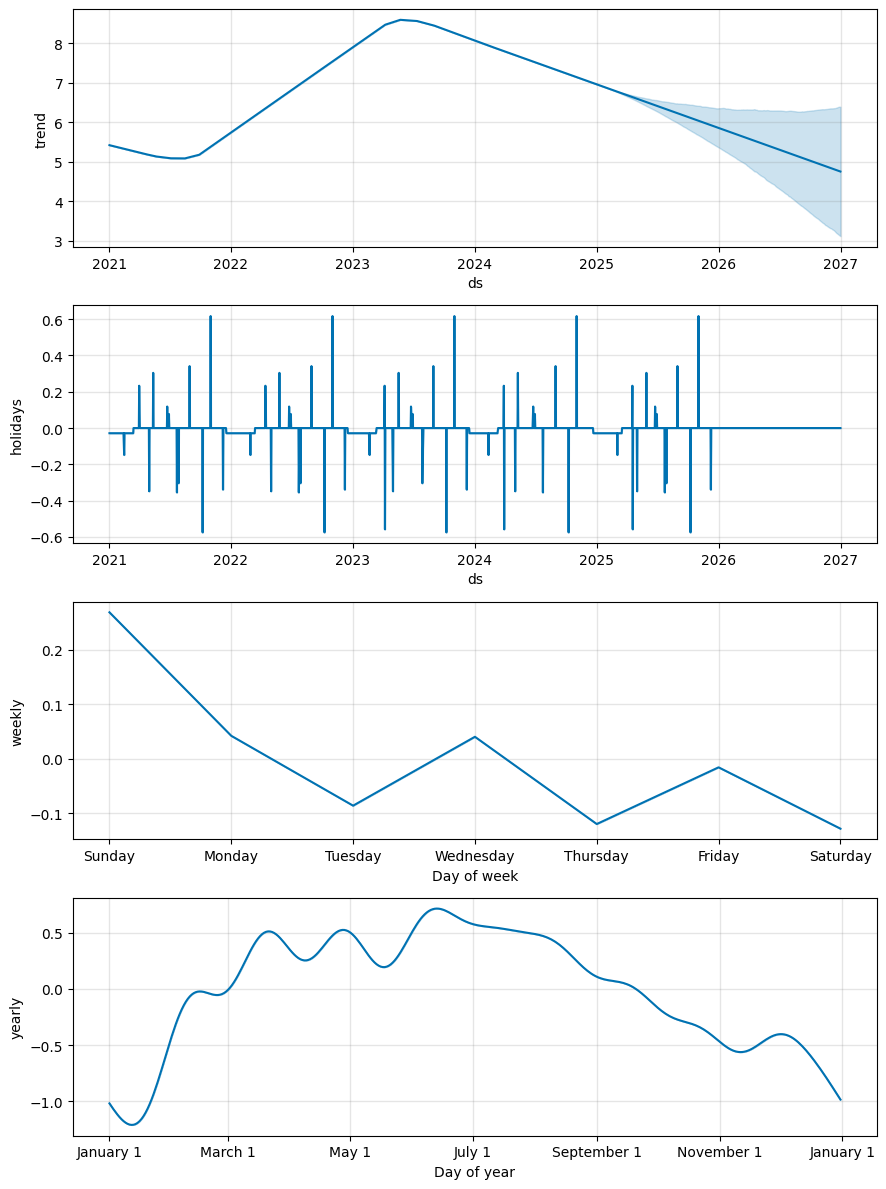

In [49]:
fig = m.plot_components(forecast)